# Interpreting ResNet Model With GradCAM

Interpretations of the predictions are generated and visualized using Gradient CAM algorithm, specifically the `GradCAMInterpreter` class.

In [1]:
from PIL import Image
import paddle
import interpretdl as it
from interpretdl.data_processor.readers import read_image

/opt/anaconda3/envs/paddle/lib/python3.8/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/opt/anaconda3/envs/paddle/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/opt/anaconda3/envs/paddle/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


In [17]:
# load from paddle.vision

from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)

ResNet(
  (conv1): Conv2D(3, 64, kernel_size=[7, 7], stride=[2, 2], padding=3, data_format=NCHW)
  (bn1): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
  (relu): ReLU()
  (maxpool): MaxPool2D(kernel_size=3, stride=2, padding=1)
  (layer1): Sequential(
    (0): BottleneckBlock(
      (conv1): Conv2D(64, 64, kernel_size=[1, 1], data_format=NCHW)
      (bn1): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
      (conv2): Conv2D(64, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
      (bn2): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
      (conv3): Conv2D(64, 256, kernel_size=[1, 1], data_format=NCHW)
      (bn3): BatchNorm2D(num_features=256, momentum=0.9, epsilon=1e-05)
      (relu): ReLU()
      (downsample): Sequential(
        (0): Conv2D(64, 256, kernel_size=[1, 1], data_format=NCHW)
        (1): BatchNorm2D(num_features=256, momentum=0.9, epsilon=1e-05)
      )
    )
    (1): BottleneckBlock(
      (conv1): Conv2D(256, 64, kernel_size=[1, 1

Initialize the `GradCAMInterpreter`. 

In [8]:
gradcam = it.GradCAMInterpreter(paddle_model, device='cpu')

Before interpreting the image, we first take a look at the original image.

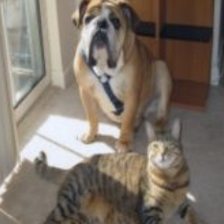

In [9]:
img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Gradient CAM method helps us `interpret` the image with respect to the predicted label, which is bull mastiff. We choose the last layer as the target layer.



### show feature_map name

In [10]:
layers_name = []
for n, v in paddle_model.named_sublayers():
    layers_name.append(n)
print(layers_name)

['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1.0', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.relu', 'layer1.0.downsample', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.relu', 'layer1.2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.relu', 'layer2', 'layer2.0', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.relu', 'layer2.0.downsample', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.relu', 'layer2.2', 'layer2.2.conv1', 'layer2.2.bn1', 'layer2.2.conv2', 'layer2.2.bn2', 'layer2.2.conv3', 'layer2.2.bn3', 'layer2.2.relu', 'layer2.3', 

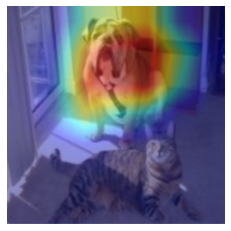

In [12]:
heatmap = gradcam.interpret(
        img_path,
        'layer4.2.conv3',
        label=None,
        visual=True,
        save_path=None)

Let's see what happens if our target label is 282 (tiger cat.)

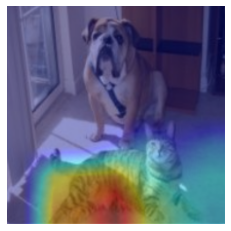

In [13]:
heatmap = gradcam.interpret(
        img_path,
        'layer4.2.conv3',
        label=282,
        visual=True,
        save_path=None)

Note that `GradCAMInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!